##CREDIT Exploratory Data Analysis

This case study serves as an illustration of how Exploratory Data Analysis (EDA) is applied in mitigating financial lending risks and analyse loan default risks. Credit card fraud inflicts substantial financial losses annually, prompting a shift in the financial industry towards predictive fraud detection algorithms. Loan providers often grapple with the challenge of extending loans to individuals with limited or absent credit histories, a situation that some consumers exploit by defaulting on their loans. Here, the application of EDA is pivotal in identifying data patterns to ensure loans are not declined for borrowers capable of repayment.

When evaluating loan applications, the company's decision-making process hinges on the applicant's profile, involving two critical risks: Denying a loan to a creditworthy applicant results in a business loss and approving a loan to an applicant likely to default or commit fraud can lead to financial losses for the company.

The dataset under consideration contains information related to loan applications.


In [ ]:
#importing necessary python libraries and importing the data set
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import csv
ab = pd.read_csv('application_data.csv')

In [ ]:
ab.info()
print(ab.shape) #understanding the data for futher intepretation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27166 entries, 0 to 27165
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 25.3+ MB
(27166, 122)


##Data quality check and missing values

In [ ]:
#There are 3 columns with mixed data type/ wrong data type : DAYS_FIRST_DRAWING, SELLERPLACE_AREA,'CNT_PAYMENT'

In [ ]:
print(((ab.isnull().sum())>0).sum()) #checking for null values
#There are 67 columns with null  in ab

65


In [ ]:
ab.isnull().sum()
ab = ab.loc[:, ab.isnull().mean() < .4]
ab.info()
ab.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27166 entries, 0 to 27165
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   27166 non-null  int64  
 1   TARGET                       27166 non-null  int64  
 2   NAME_CONTRACT_TYPE           27166 non-null  object 
 3   CODE_GENDER                  27166 non-null  object 
 4   FLAG_OWN_CAR                 27166 non-null  object 
 5   FLAG_OWN_REALTY              27166 non-null  object 
 6   CNT_CHILDREN                 27166 non-null  int64  
 7   AMT_INCOME_TOTAL             27166 non-null  float64
 8   AMT_CREDIT                   27166 non-null  float64
 9   AMT_ANNUITY                  27166 non-null  float64
 10  AMT_GOODS_PRICE              27144 non-null  float64
 11  NAME_TYPE_SUITE              27053 non-null  object 
 12  NAME_INCOME_TYPE             27166 non-null  object 
 13  NAME_EDUCATION_T

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     3634
AMT_REQ_CREDIT_BUREAU_WEEK    3634
AMT_REQ_CREDIT_BUREAU_MON     3634
AMT_REQ_CREDIT_BUREAU_QRT     3635
AMT_REQ_CREDIT_BUREAU_YEAR    3635
Length: 73, dtype: int64

In [ ]:
#After dropping all the columns with more than 50% null values the total number of columns is 73.

In [ ]:
ab=ab[-(ab['AMT_ANNUITY'].isnull())] #deleting rows with less than 2% missing values in the column
ab=ab[-(ab['EXT_SOURCE_2'].isnull())]
ab=ab[-(ab['AMT_GOODS_PRICE'].isnull())]
ab=ab[-(ab['OBS_30_CNT_SOCIAL_CIRCLE'].isnull())]
ab=ab[-(ab['DEF_30_CNT_SOCIAL_CIRCLE'].isnull())]
ab=ab[-(ab['OBS_60_CNT_SOCIAL_CIRCLE'].isnull())]
ab=ab[-(ab['DEF_60_CNT_SOCIAL_CIRCLE'].isnull())]
ab=ab[-(ab['NAME_TYPE_SUITE'].isnull())]
ab.isnull().sum()
#dropping all the rows with less than 5% missing values

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     3589
AMT_REQ_CREDIT_BUREAU_WEEK    3589
AMT_REQ_CREDIT_BUREAU_MON     3589
AMT_REQ_CREDIT_BUREAU_QRT     3590
AMT_REQ_CREDIT_BUREAU_YEAR    3590
Length: 73, dtype: int64

In [ ]:
#the rest of the null values with numerical data type are to be filled with mean and median forAMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON ,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
# Columns EXT_SOURCE_3 and OCCUPATION_TYPE are to be filled with the median values
#ab['AMT_REQ_CREDIT_BUREAU_HOUR']=ab['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(ab['AMT_REQ_CREDIT_BUREAU_HOUR'].mean()[0])
ab['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()
#Understood that 24th,50th , 75th and 100th percentile is 0, the box plot is a linear line
ab['AMT_REQ_CREDIT_BUREAU_HOUR'].quantile([0.7,0.9,0.95,0.99,1])

0.70    0.0
0.90    0.0
0.95    0.0
0.99    0.0
1.00    2.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<Axes: >

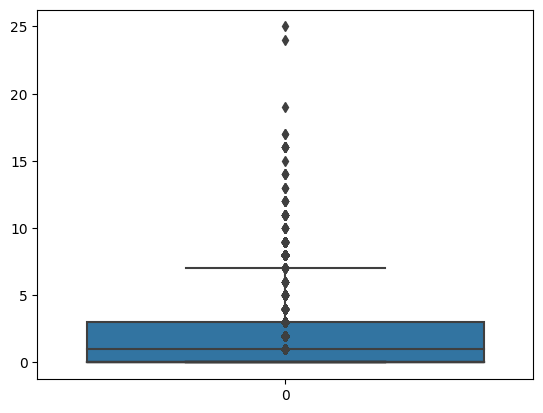

In [ ]:
sns.boxplot(ab.AMT_REQ_CREDIT_BUREAU_DAY)
sns.boxplot(ab.AMT_REQ_CREDIT_BUREAU_WEEK)
sns.boxplot(ab.AMT_REQ_CREDIT_BUREAU_MON)
sns.boxplot(ab.AMT_REQ_CREDIT_BUREAU_QRT) #There one outlier beyond 250 which might not be the right entry so remove that
sns.boxplot(ab.AMT_REQ_CREDIT_BUREAU_YEAR) #There one outlier beyond 250 which might not be the right entry so remove that
#AMT_REQ_CREDIT_BUREAU_HOUR , AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON have outliers - a lot of values are outliers and the other values are 0, this can hence cause an issue with the analysis.
#This also means that the until the 100th percentile the attempts made for credit enquiries is 0. There are only a few values for whoch the attmepts have been made. Hence it is better to drop these values/ not ocnsider them for analysis.

In [ ]:
#There are also about 10 columns checking if the documents required are provided by the cient or not. This does not contribute/is a factor that can help us determine if the loan will be defaulted or not, so these can also be dropped.
dropped=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
ab.drop(labels=dropped,axis=1,inplace=True)
ab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26890 entries, 0 to 27165
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   26890 non-null  int64  
 1   TARGET                       26890 non-null  int64  
 2   NAME_CONTRACT_TYPE           26890 non-null  object 
 3   CODE_GENDER                  26890 non-null  object 
 4   FLAG_OWN_CAR                 26890 non-null  object 
 5   FLAG_OWN_REALTY              26890 non-null  object 
 6   CNT_CHILDREN                 26890 non-null  int64  
 7   AMT_INCOME_TOTAL             26890 non-null  float64
 8   AMT_CREDIT                   26890 non-null  float64
 9   AMT_ANNUITY                  26890 non-null  float64
 10  AMT_GOODS_PRICE              26890 non-null  float64
 11  NAME_TYPE_SUITE              26890 non-null  object 
 12  NAME_INCOME_TYPE             26890 non-null  object 
 13  NAME_EDUCATION_T

In [ ]:
Flag=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_EMAIL','FLAG_PHONE']
ab.drop(labels=Flag,axis=1,inplace=True)
ab.info()
#Flag is a liost with all the other unecessary columns. These provide the details of if the phone number, email,and other personal details are given. these are pre requisites to be met for getting the loan approved hence they do not serve purpose

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26890 entries, 0 to 27165
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   26890 non-null  int64  
 1   TARGET                       26890 non-null  int64  
 2   NAME_CONTRACT_TYPE           26890 non-null  object 
 3   CODE_GENDER                  26890 non-null  object 
 4   CNT_CHILDREN                 26890 non-null  int64  
 5   AMT_INCOME_TOTAL             26890 non-null  float64
 6   AMT_CREDIT                   26890 non-null  float64
 7   AMT_ANNUITY                  26890 non-null  float64
 8   AMT_GOODS_PRICE              26890 non-null  float64
 9   NAME_TYPE_SUITE              26890 non-null  object 
 10  NAME_INCOME_TYPE             26890 non-null  object 
 11  NAME_EDUCATION_TYPE          26890 non-null  object 
 12  NAME_FAMILY_STATUS           26890 non-null  object 
 13  NAME_HOUSING_TYP

In [ ]:
#Total number of columns after dropping all the unecessary columns is 45
#Now the data is ready for further analysis.

Missing Values: Current Application: 67

1. For columns with more than 50% null values - 73 columns dropped
2. Remove rows with less than 5% missing values.
3. Replace the null values between 5 -40% missing values with Mean/Median for continuous numeric columns.
4. Replace the null values between 5 -40% missing values with Mode for Categorical columns.

In [ ]:
ab.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE                8411
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION 

<Axes: >

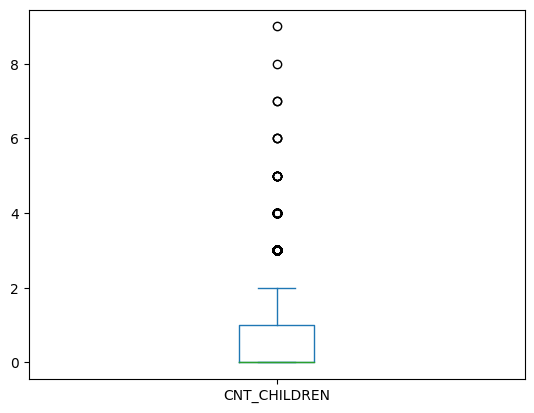

In [ ]:
#we will further analyse the columns to explore any incorrect entry/ outliers
ab.CODE_GENDER.value_counts()
#There are a few rows with XNA value which is incorrect and those rows has to be dropped.
ab= ab[-(ab['CODE_GENDER'] == 'XNA')]
ab.CNT_CHILDREN.value_counts()
#There are multiple extreme values in the chidrens count.These are outliers which needs to be avoided at the time of analysis
ab.CNT_CHILDREN.plot.box()
#We can look into the data in terms of the percentile rather than the whole data set. Majority of the appicants have either no kids/1,2 or 3. 3+ is very rare

##CHILDREN COUNT
1. Children count refers to the number of children per applicant
2. We can see that most of the values, until the 100th percentile lies between 0-2 children.
3. There are a few applicants with 3 children. However the count more than 7 are extreme outliers and not a usual case scenario.

<Axes: >

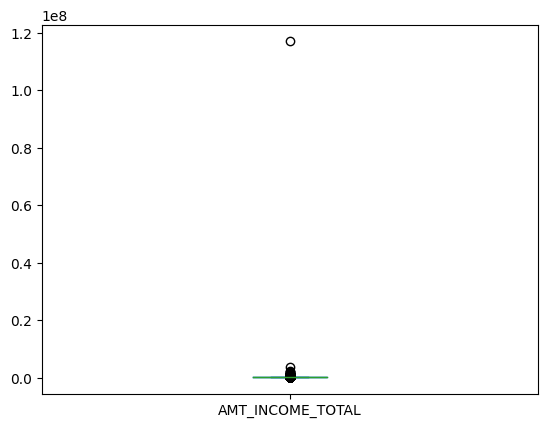

In [ ]:
ab.AMT_INCOME_TOTAL.plot.box() #we cannot compute the analysis with the outlier in the amoount, for the analysis this has to be skipped. Also for any null values we have to compute median in this case. The mean value will not be significant for the graph

##TOTAL INCOME AMOUNT
1. Total Income Amount refers to the income of the applicants
2. We see that there is one extreme outlier, which can be a problem in the analysis. This value has to be avoided while analyzing the data.
3. The value can be retained since certain applicants could be of high income groups. However while computing averages this has to be avoided. We can also use Median values for missing/null values in this case.

<Axes: >

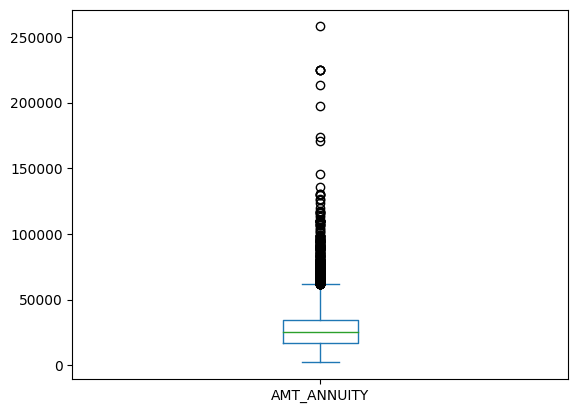

In [ ]:
ab.AMT_ANNUITY.plot.box()
#Majority of the values are outlier values in annuity

##AMOUNT ANNUITY
1. Total Income Amount refers to the income of the applicants
2. We see that there is one extreme outlier, which can be a problem in the analysis. This value has to be avoided while analyzing the data.
3. The value can be retained since certain applicants could be of high income groups. However while computing averages this has to be avoided. We can also use Median values for missing/null values in this case.

<Axes: >

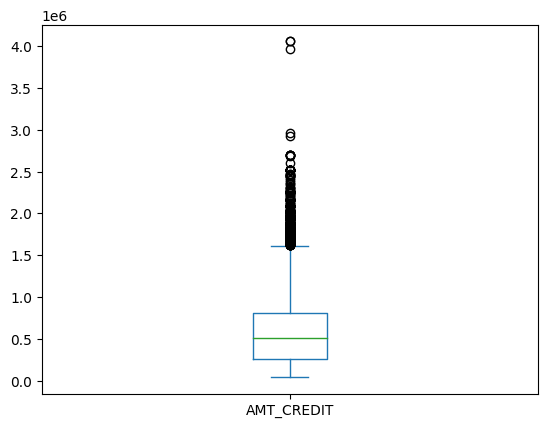

In [ ]:
ab.AMT_CREDIT.plot.box()

##AMOUNT CREDIT
1. Total credit Amount refers to the creditof the applicants
2. We see that there are several extreme outlier, which can be a problem in the analysis.
3. These have to treated as an outlier itslef

In [ ]:
ab.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    5867
XNA                       4835
Self-employed             3409
Other                     1473
Medicine                   994
Government                 929
Business Entity Type 2     911
School                     814
Trade: type 7              656
Kindergarten               606
Construction               557
Business Entity Type 1     499
Transport: type 4          432
Trade: type 3              310
Industry: type 9           300
Industry: type 3           291
Security                   286
Housing                    265
Industry: type 11          246
Bank                       239
Military                   232
Transport: type 2          227
Agriculture                199
Police                     192
Postal                     179
Security Ministries        167
Services                   166
Trade: type 2              160
Restaurant                 139
Industry: type 7           123
University                 106
Hotel                      103
Transpor

In [ ]:
ab= ab[-(ab['ORGANIZATION_TYPE']=='XNA')]
#Dropping the columns with no value available.


##OTHER OUTLIERS:
AMT_REQ_CREDIT_BUREAU_DAY,
AMT_REQ_CREDIT_BUREAU_WEEK,
AMT_REQ_CREDIT_BUREAU_MON

The following columns have a lot of values that are outliers and the rest are 0(0-100th Percentile), this can hence cause an issue with the analysis.

AMT_REQ_CREDIT_BUREAU_QRT,
AMT_REQ_CREDIT_BUREAU_YEAR

There is one outlier beyond 250 which might not be the right entry so this has to be removed since it does not add sense to the data.




In [ ]:
ab.info() #checking is all the data types are correct. The numeric datas have picked up int/float and the categorical data has accepted the correct data type
ab.NAME_INCOME_TYPE.value_counts() #no incorrect/invalid data
ab.NAME_FAMILY_STATUS.value_counts()
ab.NAME_TYPE_SUITE.value_counts()
ab.NAME_EDUCATION_TYPE.value_counts()
ab.NAME_INCOME_TYPE.value_counts()
ab.NAME_HOUSING_TYPE.value_counts()
ab.OCCUPATION_TYPE.value_counts()
#All the object columns have non null and meningful values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22055 entries, 0 to 27165
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   22055 non-null  int64  
 1   TARGET                       22055 non-null  int64  
 2   NAME_CONTRACT_TYPE           22055 non-null  object 
 3   CODE_GENDER                  22055 non-null  object 
 4   CNT_CHILDREN                 22055 non-null  int64  
 5   AMT_INCOME_TOTAL             22055 non-null  float64
 6   AMT_CREDIT                   22055 non-null  float64
 7   AMT_ANNUITY                  22055 non-null  float64
 8   AMT_GOODS_PRICE              22055 non-null  float64
 9   NAME_TYPE_SUITE              22055 non-null  object 
 10  NAME_INCOME_TYPE             22055 non-null  object 
 11  NAME_EDUCATION_TYPE          22055 non-null  object 
 12  NAME_FAMILY_STATUS           22055 non-null  object 
 13  NAME_HOUSING_TYP

Laborers                 4799
Sales staff              2832
Core staff               2429
Managers                 1817
Drivers                  1619
High skill tech staff     990
Accountants               863
Medicine staff            762
Security staff            612
Cooking staff             511
Cleaning staff            384
Private service staff     253
Low-skill Laborers        215
Secretaries               115
Waiters/barmen staff      111
Realty agents              76
HR staff                   47
IT staff                   44
Name: OCCUPATION_TYPE, dtype: int64

0    0.914487
1    0.085513
Name: TARGET, dtype: float64

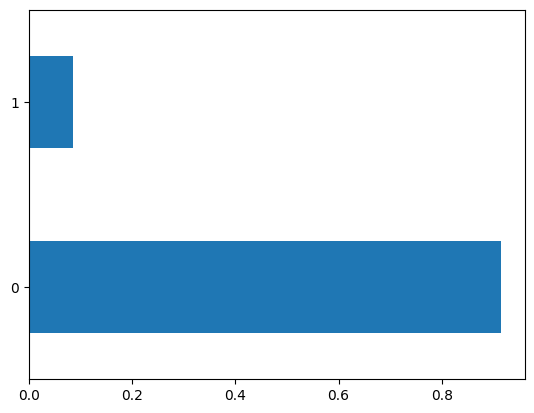

In [ ]:
import matplotlib.pyplot as plt
ab.TARGET.value_counts(normalize=True).plot.barh()
ab.TARGET.value_counts(normalize=True)
#We can see that there is a imbalance in the target columns which is the key column of analysis
#the ratio of Defaulted to non defaulted is 0.09:0.91



##IMBALANCE RATIO:



1. The imbalance ratio (IR) is the most
commonly used measure to describe the imbalance extent of a dataset.
2. The imbalance ratio of the data set is derived from the 'TARGET' column in Current Application.
3. The imbalance ratio of Defaulted to non defaulted is 0.09: 0.91, which means there is about 10% imbalance.

<Axes: >

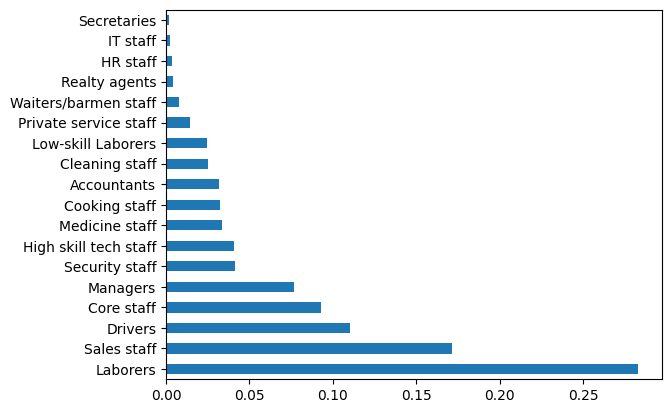

In [ ]:
ab[(ab['TARGET']==1)].OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
#Using Target =1 to understand the ratio of clients with payment difficulties
#From The graph we are able to see that labourers have been facing difficulty in paying the first installement, about 30% of them coming from laborers.
#Occupation with least number of defaulters in first payment are HR staff & IT Staff followed by Realty agents and Secreteries.

##OCCUPATION TYPE

1. Occupation Type is the occupation of all the applicants. The graph represents the percentage of applicants in the respective occupations who has had late payments in the initial installments
2. 30% of applicants who have had difficulty paying the first few installments are Laborers.
3. HR staff and IT staff have not had any defaults.
4. Other than Managers, Core staff, Drivers, Sales staff all the other occupations contribute less than 5%.

<Axes: >

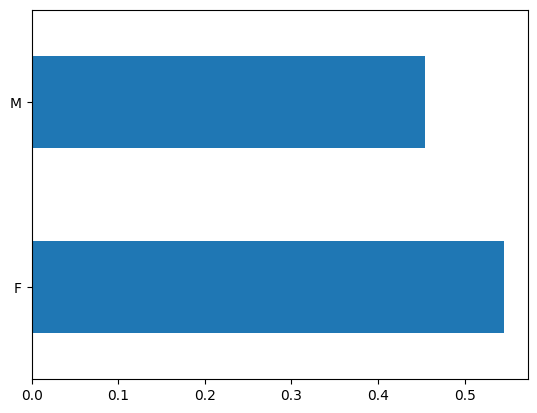

In [ ]:
ab[(ab['TARGET']==1)].CODE_GENDER.value_counts(normalize=True).plot.barh()
#We are also able to see that most people with issue in paying the first few installments are women over men

##GENDER
1. The graph represents the percentage of applicants and their gender who has had late payments in the initial installments
2. Female applicants have shown higher tendency to late payments.
3. However the difference in percentage is not significantly high.

<Axes: >

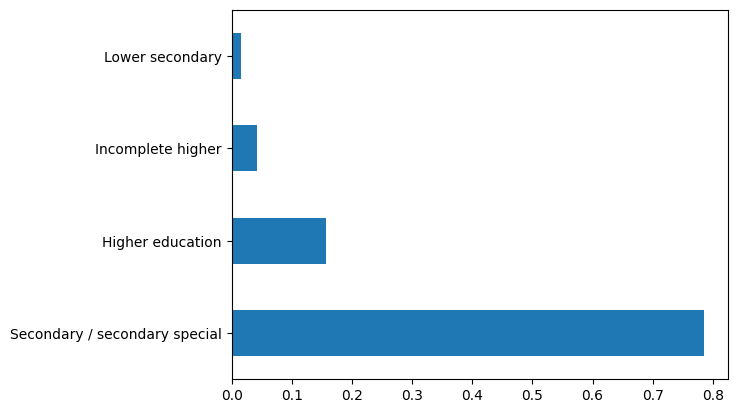

In [ ]:
ab[(ab['TARGET']==1)].NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
#we are also able to see that the people with most default have secondary education however this is not enough to make any conclusions

##EDUCATION TYPE

1. Education Type is the highest qualification of the applicants. The graph represents the percentage of applicants and their respective highest qualification who has had late payments in the initial installments
2. Applicants with Secondary/ Secondary Special education have defaulted the initial payments. Followed by Higher education
3. Applicants with Academic Degree education have not defaulted any payments.

<Axes: >

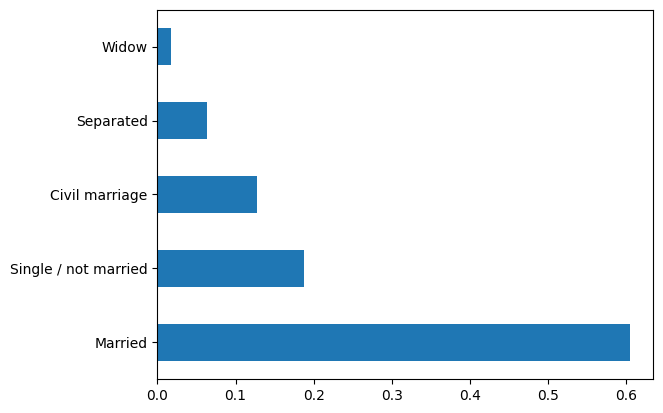

In [ ]:
ab[(ab['TARGET']==1)].NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
#Married people are more likely to default. This could be because of the higher living expenses. However this is not enough to make any conclusions.


##FAMILY STATUS
1. The graph represents the percentage of applicants and their respective family status who has had late payments in the initial installments.
2. Applicants who are Married have been the highest contributor in default initial payments. 60% of the applicants are married.
3. Widows and Separated applicants have shown lower tendency to default payments.

<Axes: >

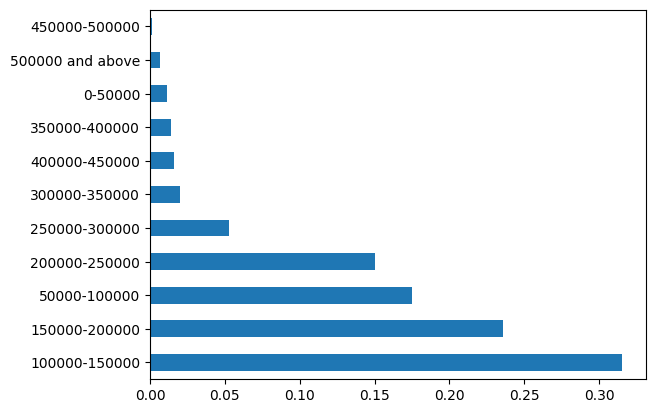

In [ ]:
bin = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
slot = ['0-50000','50000-100000','100000-150000', '150000-200000',
       '200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']

ab['INCOME_RANGE']=pd.cut(ab.AMT_INCOME_TOTAL,bins = bin, labels= slot)
ab[(ab['TARGET']==1)].INCOME_RANGE.value_counts(normalize=True).plot.barh()


##INCOME GROUP:
1. The graph represents the percentage of applicants and their respective income who have delayed payments in the initial installments.
2. Applicants that have highly defaulted are in the range of 50,000-2,00,000.
3. Applicants with higher income have defaulted less with an exception of 0-50000 income range, where the default range is again low. However this could also be because the number of samples under 50000 income is lower.

<Axes: >

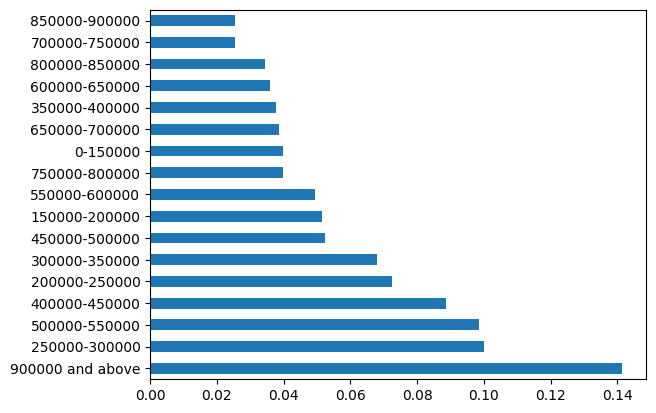

In [ ]:
binn = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

ab['CREDIT_RANGE']=pd.cut(ab['AMT_CREDIT'],bins=binn,labels=slots)
ab[(ab['TARGET']==1)].CREDIT_RANGE.value_counts(normalize=True).plot.barh()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ab[(ab['TARGET']==1)].CREDIT_RANGE.value_counts(normalize=True)
xy = ab[-(ab['TARGET']==0)] #Creating a new dataframe with TARGET= 1
yz = ab[-(ab['TARGET']==1)]#Creating a new dataframe with TARGET= 0

Text(0.5, 0, 'Income Range')

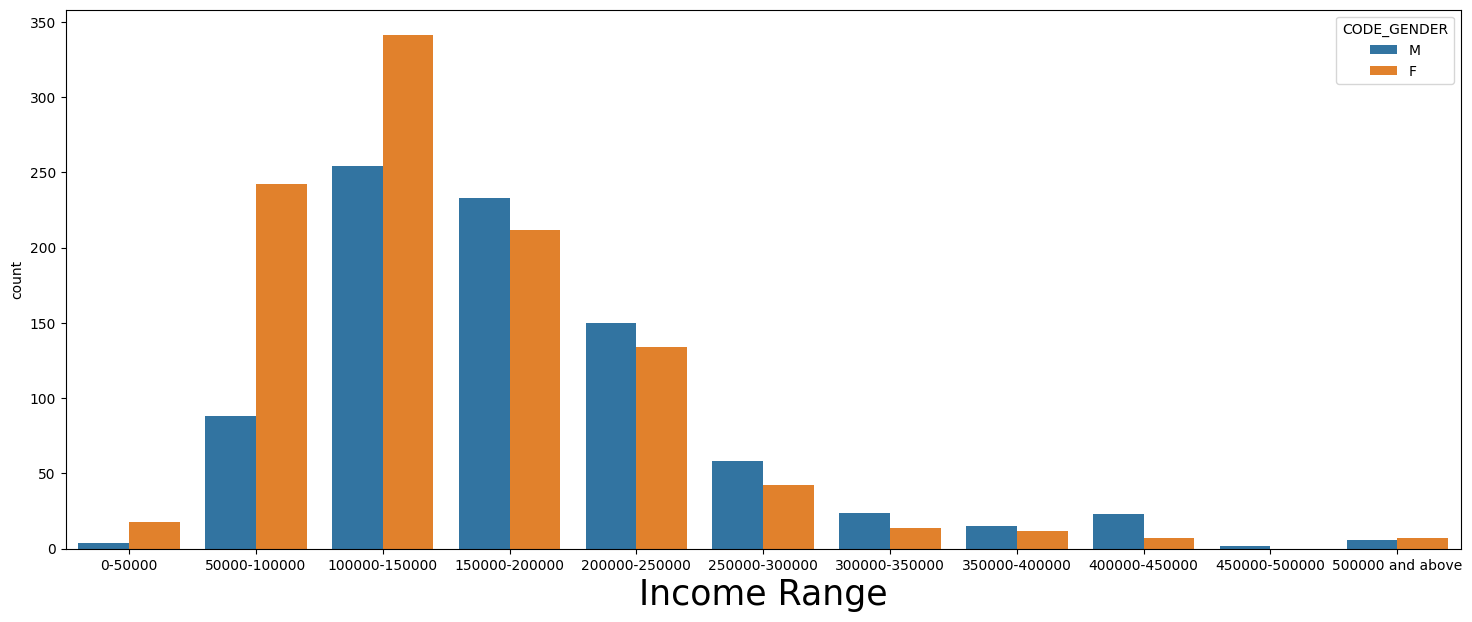

In [ ]:
plt.figure(figsize=[18,7])
sns.countplot(data=xy,x='INCOME_RANGE',hue='CODE_GENDER')
plt.xlabel('Income Range',fontsize=25) #analysing the income by gender for target =1


1. The number of defaulters are equivalent/less than the non defaulters in high income groups and 0-50,000. This means that not many people with high income groups rarely apply for a loan and if applied they have very little chances of defaulting chance of defaulting.
2. The number of defaulters are higher in women. Men tend to not default the initial payments.

Text(0.5, 0, 'Income Range')

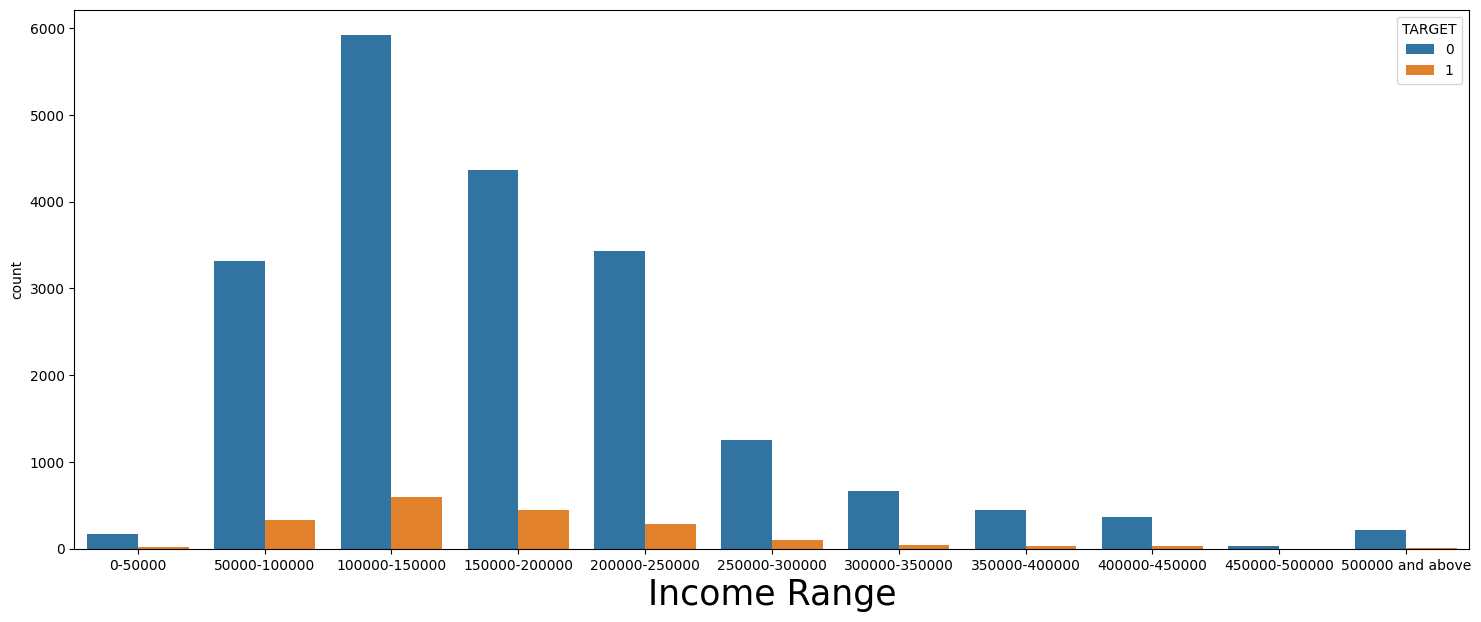

In [ ]:
plt.figure(figsize=[18,7])
sns.countplot(data=ab,x='INCOME_RANGE',hue='TARGET')
plt.xlabel('Income Range',fontsize=25) #analysing the income by target

##INCOME V/S TARGET:

1. The ratio of defaulters:non defaulters are distributed evenly except for 5,00,000 and above income range.
2. Applicants with 5,00,000 and above income has not defaulted any payments.

Text(0.5, 0, 'Income Range')

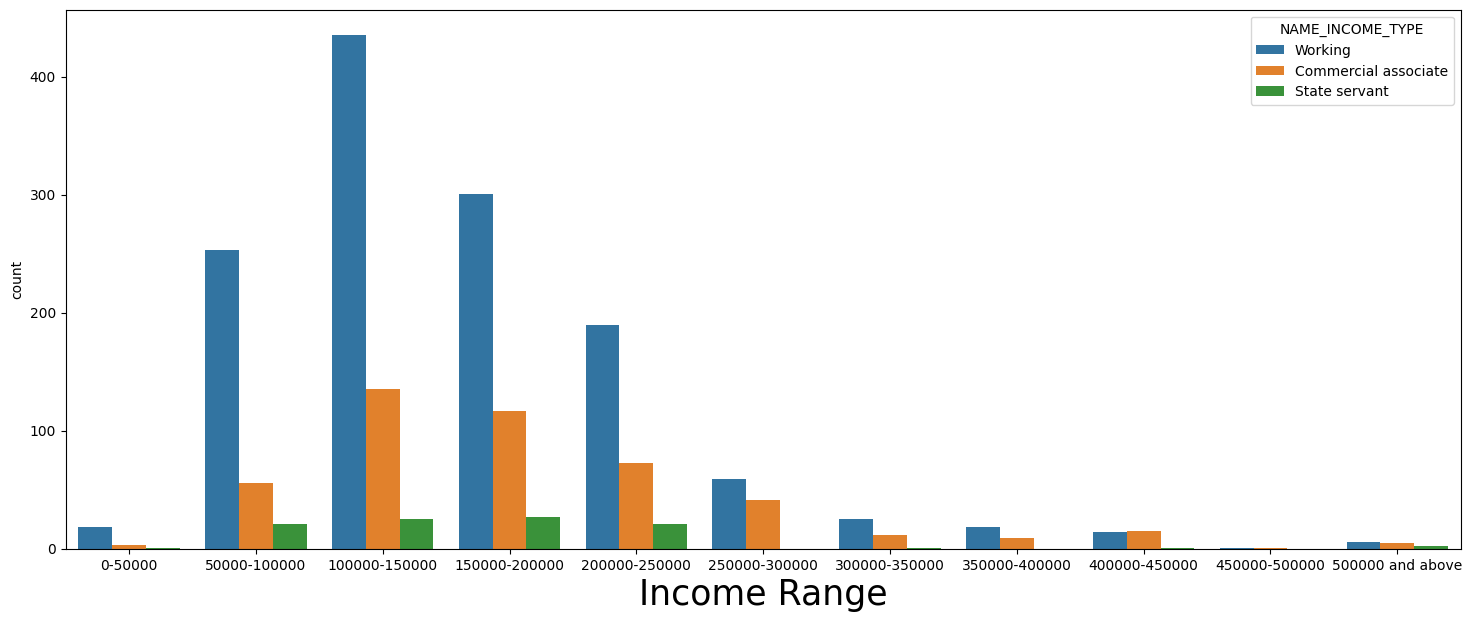

In [ ]:
plt.figure(figsize=[18,7])
sns.countplot(data=xy,x='INCOME_RANGE',hue='NAME_INCOME_TYPE')
plt.xlabel('Income Range',fontsize=25) #analysing incoe range by income type for defaulters

Text(0.5, 0, 'Income Range')

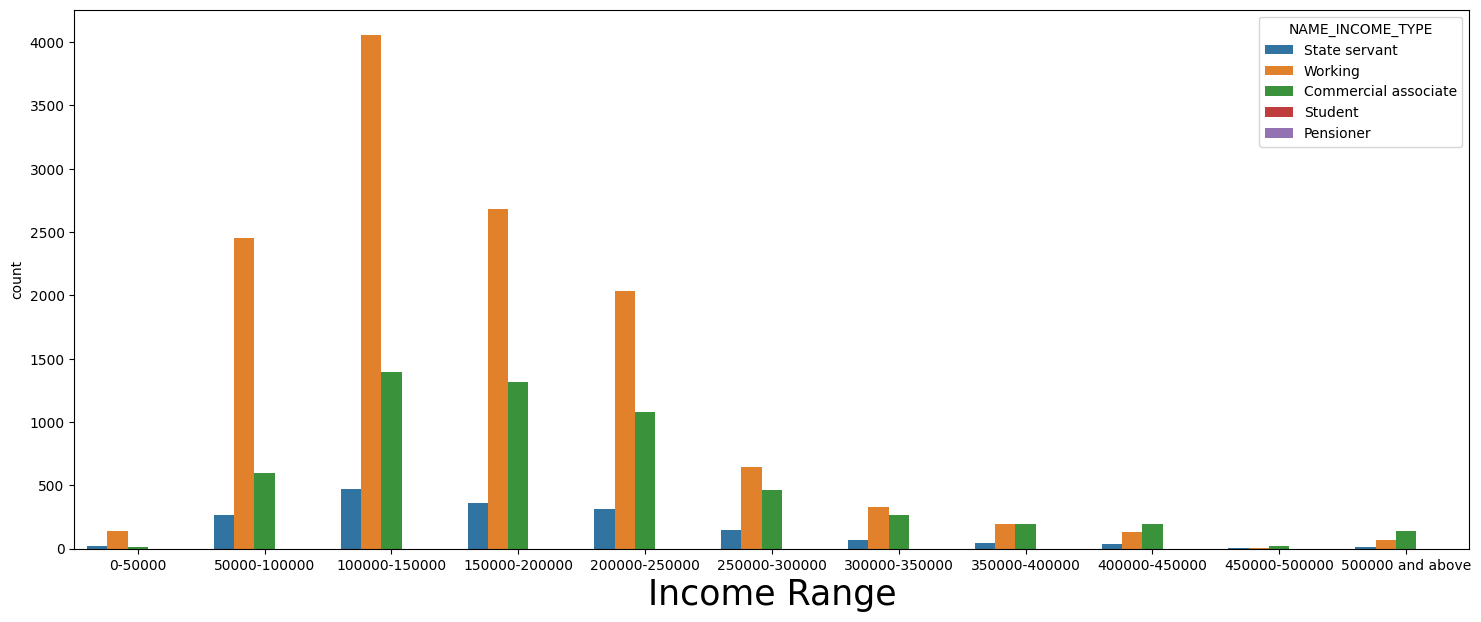

In [ ]:
plt.figure(figsize=[18,7])
sns.countplot(data=yz,x='INCOME_RANGE',hue='NAME_INCOME_TYPE')
plt.xlabel('Income Range',fontsize=25) #analyzing income range by income type for non defaulters

1. Applicants that are Students, pensioners, and businessmen are completely defaulters in initial payments. The number of applicants though significantly low in these working type, all the applicants in the category has had difficulties in making the payments.

In [ ]:
yz.NAME_INCOME_TYPE.value_counts() #Checking the number of Student, Businessman, Pensioner. These groups though are smaller in size have all been defaulters.

Working                 12750
Commercial associate     5686
State servant            1730
Student                     2
Pensioner                   1
Name: NAME_INCOME_TYPE, dtype: int64

Text(0.5, 0, 'Organisation Type')

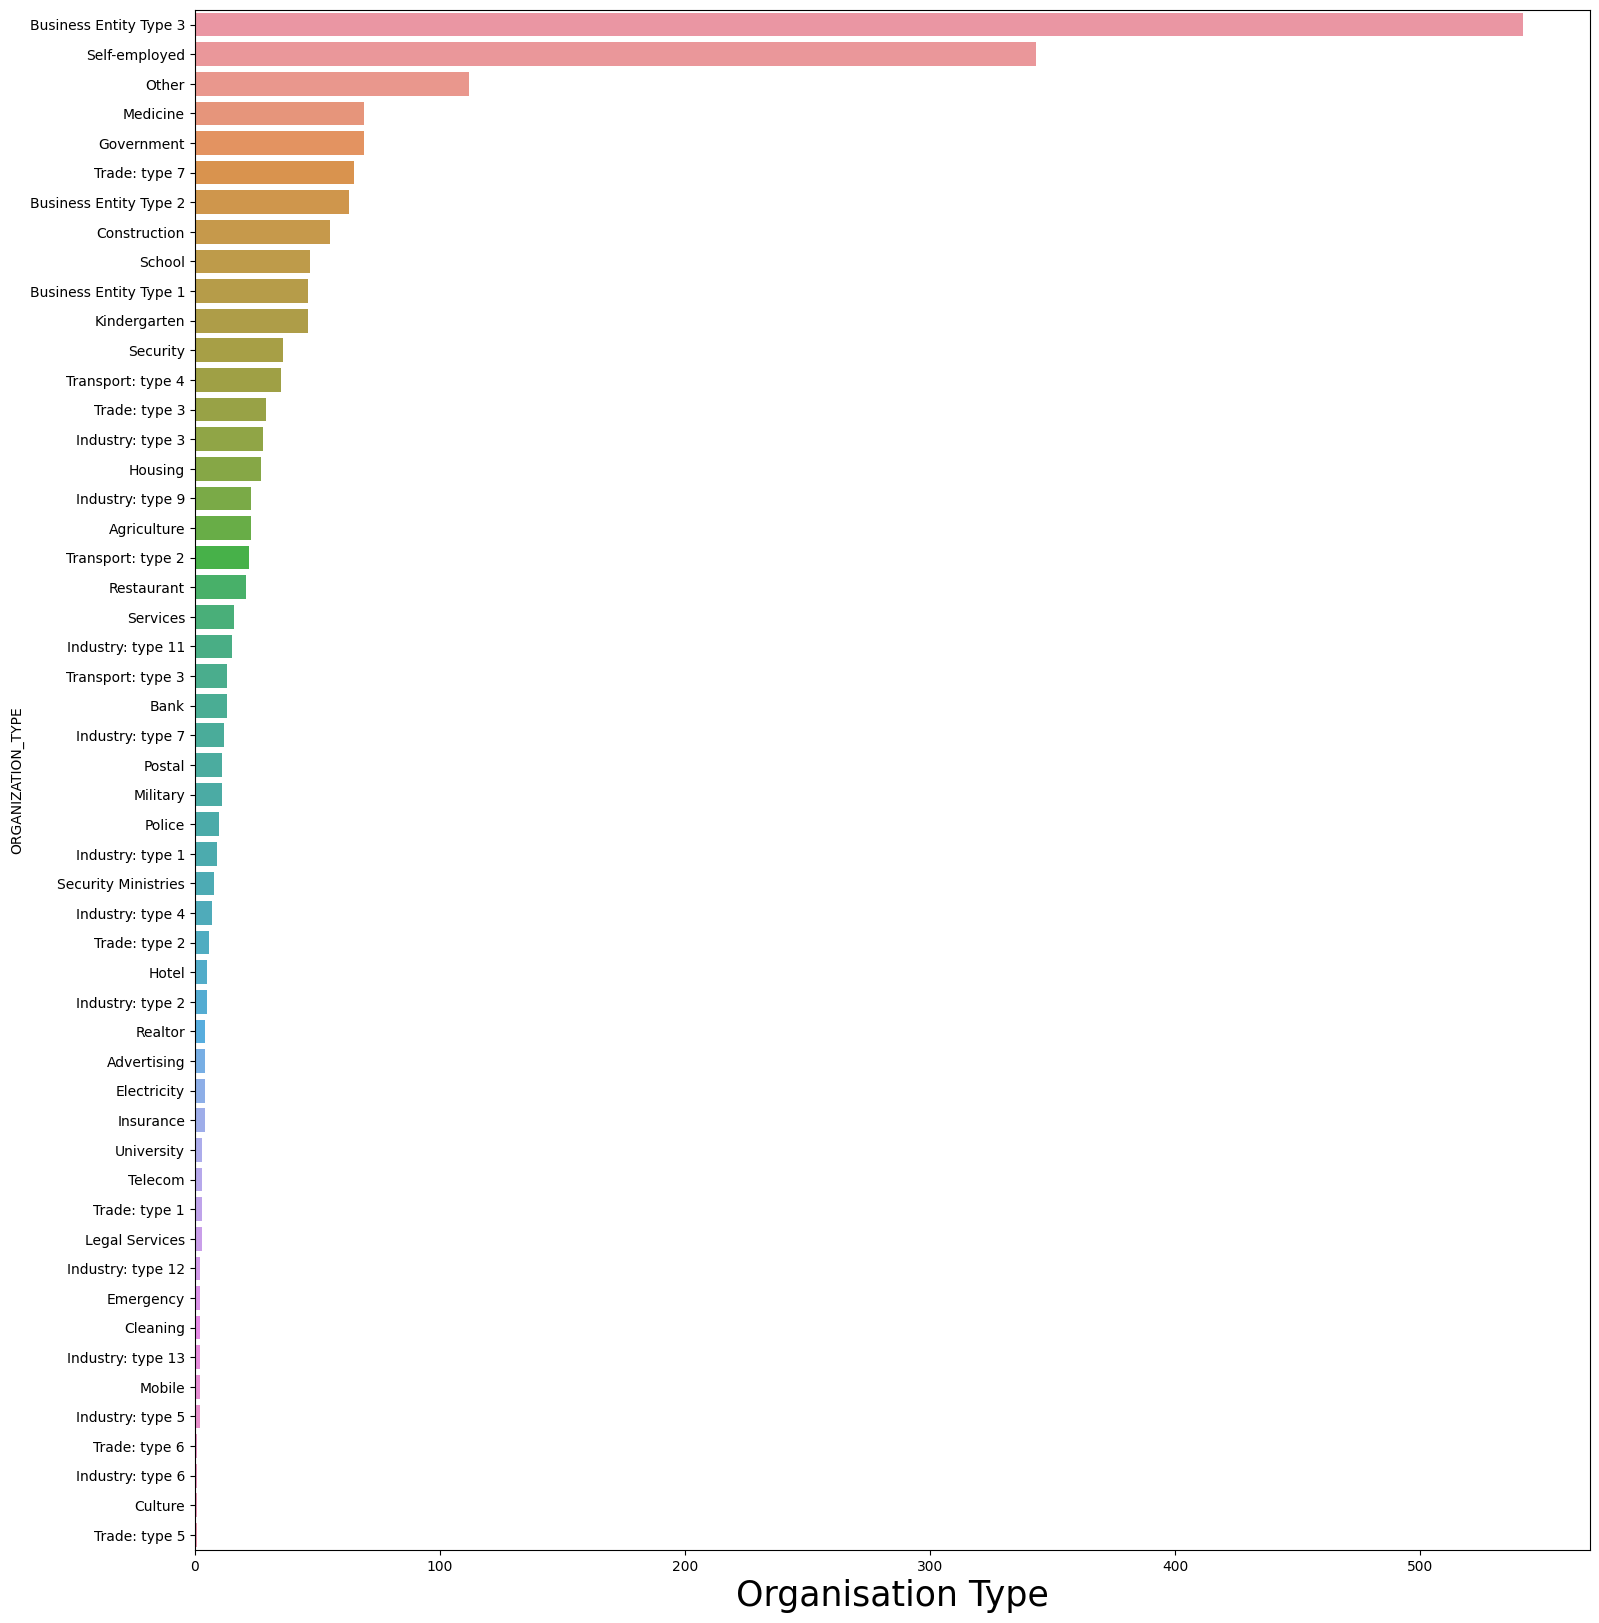

In [ ]:
plt.figure(figsize=[18,20])
sns.countplot(data=xy,y='ORGANIZATION_TYPE',order=xy.ORGANIZATION_TYPE.value_counts().index)
plt.xlabel('Organisation Type',fontsize=25)

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

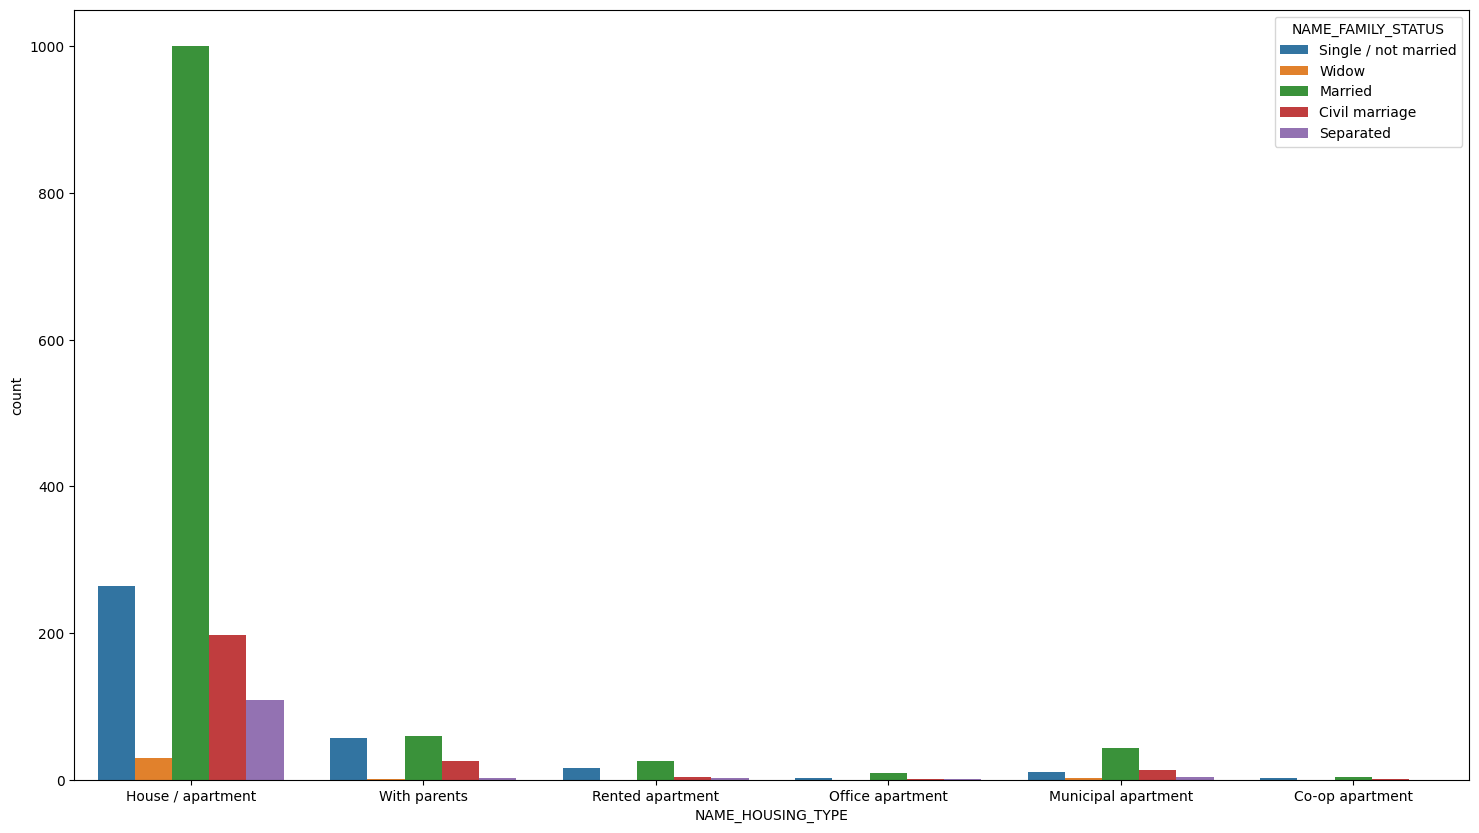

In [ ]:
plt.figure(figsize=[18,10])
sns.countplot(data=xy,x='NAME_HOUSING_TYPE',hue='NAME_FAMILY_STATUS')#target = 0

##HOUSING TYPE / FAMILY STATUS- DEFAULTERS
1. Applicants who are married and owns their own house/apartements contribute to the highest default in initial payments. They are significantly high compared to all the other housing types 2.Other housing types, namely rented, staying with parents, office/muncipal/co-operate apartments contribute least to the list.

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

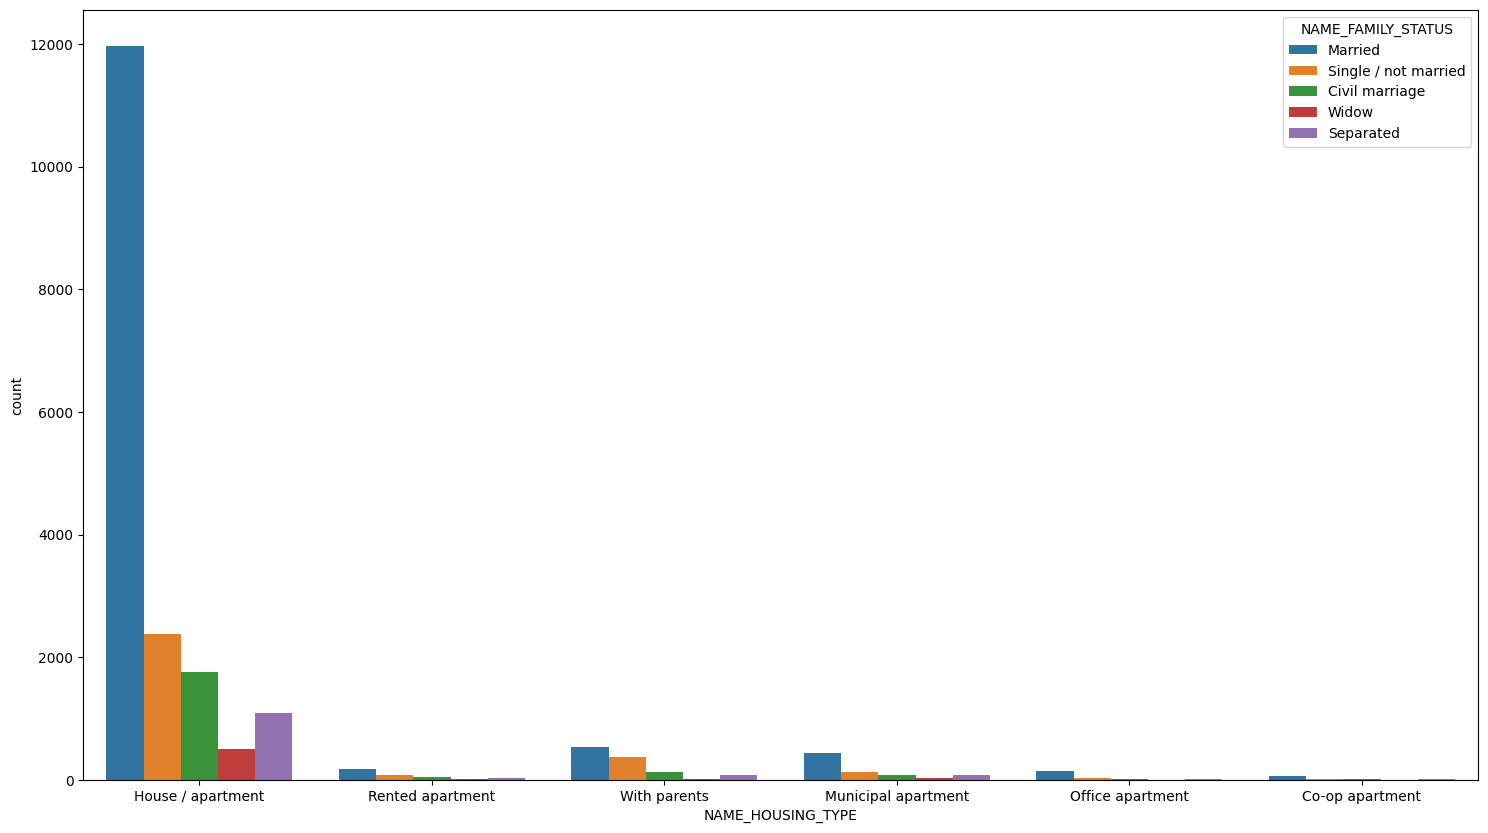

In [ ]:
plt.figure(figsize=[18,10])
sns.countplot(data=yz,x='NAME_HOUSING_TYPE',hue='NAME_FAMILY_STATUS')
#Most of the applicants are married and have their own houses,

##HOUSING TYPE / FAMILY STATUS- NON DEFAULTERS:

1. Applicants who are married and owns their own house/apartments contribute to the highest non default in initial payments. They are significantly high compared to all the other housing types 2.Other housing types, have contributed fairly less.
3.This means most of the loan applicants are married people with own house/apartment.

Text(0.5, 1.0, 'CRDEIT V/S INCOME FOR NON DEFAULTERS')

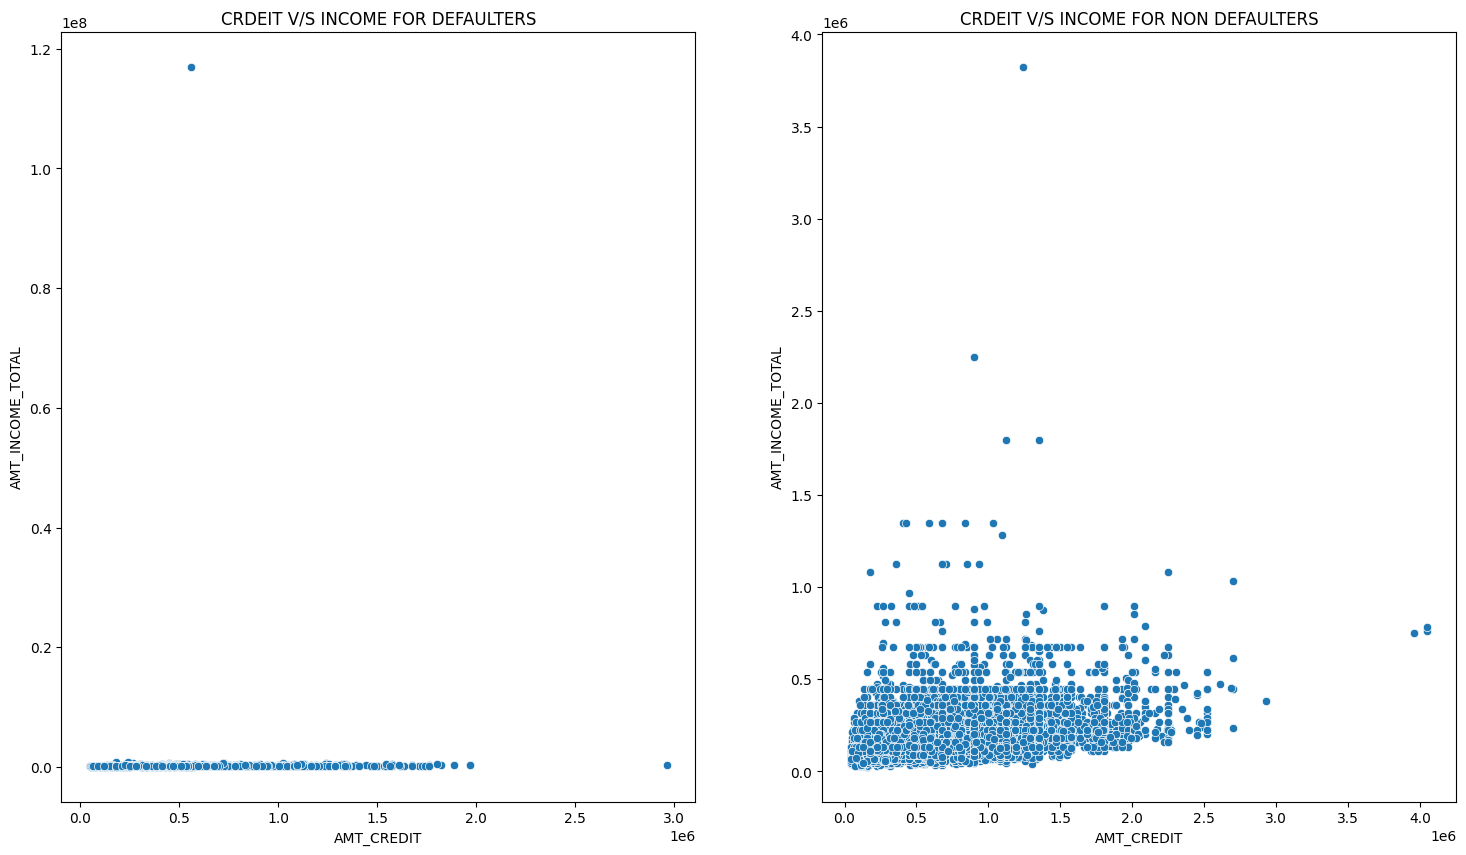

In [ ]:
plt.figure(figsize=[18,10])
plt.subplot(1,2,1)
sns.scatterplot(x=xy.AMT_CREDIT,y=xy.AMT_INCOME_TOTAL)
plt.title("CRDEIT V/S INCOME FOR DEFAULTERS")
plt.subplot(1,2,2)
sns.scatterplot(x=yz.AMT_CREDIT,y=yz.AMT_INCOME_TOTAL)
plt.title("CRDEIT V/S INCOME FOR NON DEFAULTERS")

In [ ]:
#Creating correlation matrix to dig deeper into the dataset
corr_1= xy.iloc[0:,2:].corr()
corr_2= yz.iloc[0:,2:].corr()
todrop=['DAYS_LAST_PHONE_CHANGE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_2','EXT_SOURCE_3']
corr_1.drop(labels=todrop,axis=1,inplace=True)
corr_2.drop(labels=todrop,axis=1,inplace=True)
corr_1.drop(labels=todrop,axis=0,inplace=True)
corr_2.drop(labels=todrop,axis=0,inplace=True)

In [ ]:
corr_1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE
CNT_CHILDREN,1.000000,0.011185,0.025142,0.026546,0.014085,-0.010267,0.164015,0.013567,0.140122,-0.098174,...,0.046954,0.049034,-0.029636,-0.023513,-0.016093,-0.008065,-0.018810,0.002527,0.038247,-0.027264
AMT_INCOME_TOTAL,0.011185,1.000000,0.009600,0.009388,0.006716,-0.013235,0.004112,0.009944,-0.020450,-0.016522,...,-0.012890,-0.012324,0.017340,-0.001165,-0.002140,-0.001274,-0.008615,-0.017527,-0.013768,-0.008265
AMT_CREDIT,0.025142,0.009600,1.000000,0.747929,0.982639,0.058275,-0.235125,-0.150943,-0.045766,-0.054650,...,-0.023468,-0.041586,0.046967,-0.008157,0.001920,0.018919,-0.056849,-0.059974,-0.024113,-0.036031
AMT_ANNUITY,0.026546,0.009388,0.747929,1.000000,0.748432,0.066853,-0.115737,-0.094809,-0.006220,-0.058436,...,-0.054804,-0.075487,0.028909,0.024329,0.054525,0.063279,-0.025639,-0.031823,-0.003233,-0.041770
AMT_GOODS_PRICE,0.014085,0.006716,0.982639,0.748432,1.000000,0.062001,-0.228130,-0.160005,-0.040298,-0.063512,...,-0.029623,-0.044471,0.055994,-0.011772,0.002547,0.016911,-0.061545,-0.065895,-0.030677,-0.031188
REGION_POPULATION_RELATIVE,-0.010267,-0.013235,0.058275,0.066853,0.062001,1.000000,-0.000035,0.020875,-0.022340,0.002005,...,-0.452637,-0.453031,0.179688,0.013498,0.026443,0.062137,-0.044380,-0.035247,-0.005991,0.007726
DAYS_BIRTH,0.164015,0.004112,-0.235125,-0.115737,-0.228130,-0.000035,1.000000,0.307443,0.226940,0.126050,...,0.053809,0.050483,0.019470,0.039590,0.052826,0.034154,0.133214,0.116380,0.046208,-0.010322
DAYS_EMPLOYED,0.013567,0.009944,-0.150943,-0.094809,-0.160005,0.020875,0.307443,1.000000,0.137542,0.105445,...,0.000153,-0.003330,-0.032392,0.037969,0.072900,0.058756,0.112606,0.144058,0.086909,-0.021850
DAYS_REGISTRATION,0.140122,-0.020450,-0.045766,-0.006220,-0.040298,-0.022340,0.226940,0.137542,1.000000,0.066545,...,0.114563,0.109003,-0.062784,-0.000353,-0.008232,-0.001661,0.029832,0.049026,0.029263,-0.015403
DAYS_ID_PUBLISH,-0.098174,-0.016522,-0.054650,-0.058436,-0.063512,0.002005,0.126050,0.105445,0.066545,1.000000,...,0.030422,0.023608,0.000131,0.015472,0.017618,0.017702,0.060374,0.011761,-0.027383,-0.022050


In [ ]:
corr_2

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_60_CNT_SOCIAL_CIRCLE
CNT_CHILDREN,1.000000,-0.002866,-0.014936,-0.002568,-0.019427,-0.033348,0.247852,0.071621,0.164593,-0.119758,...,0.037150,0.035498,-0.032323,-0.022704,-0.021502,-0.009259,0.000288,0.010192,0.012694,0.005255
AMT_INCOME_TOTAL,-0.002866,1.000000,0.365450,0.435903,0.372545,0.186448,-0.050554,-0.039541,0.026338,-0.026148,...,-0.210490,-0.225600,0.063559,0.067039,0.151253,0.140117,-0.000606,-0.025549,-0.016237,-0.036506
AMT_CREDIT,-0.014936,0.365450,1.000000,0.762515,0.986488,0.100476,-0.162818,-0.092153,-0.022399,-0.045711,...,-0.111545,-0.120772,0.041778,0.029550,0.060305,0.056917,-0.024397,-0.033757,-0.010937,-0.012681
AMT_ANNUITY,-0.002568,0.435903,0.762515,1.000000,0.767731,0.121578,-0.097336,-0.058847,-0.001153,-0.034947,...,-0.135952,-0.149509,0.032476,0.046594,0.090395,0.079874,-0.013017,-0.026831,-0.013510,-0.021935
AMT_GOODS_PRICE,-0.019427,0.372545,0.986488,0.767731,1.000000,0.104290,-0.157289,-0.093187,-0.017536,-0.046519,...,-0.114554,-0.122781,0.050355,0.033986,0.063226,0.058194,-0.023647,-0.034278,-0.012670,-0.014325
REGION_POPULATION_RELATIVE,-0.033348,0.186448,0.100476,0.121578,0.104290,1.000000,-0.054294,-0.007217,-0.074332,-0.006915,...,-0.548301,-0.544351,0.165230,-0.014940,0.063364,0.084393,-0.055587,-0.049541,-0.014604,-0.000331
DAYS_BIRTH,0.247852,-0.050554,-0.162818,-0.097336,-0.157289,-0.054294,1.000000,0.349013,0.304446,0.104590,...,0.060269,0.058521,0.039594,0.045705,0.034887,0.013566,0.173147,0.106464,0.015989,0.018978
DAYS_EMPLOYED,0.071621,-0.039541,-0.092153,-0.058847,-0.093187,-0.007217,0.349013,1.000000,0.174962,0.082712,...,-0.003181,-0.002473,0.018423,0.054431,0.083190,0.062000,0.115834,0.129123,0.073481,0.019514
DAYS_REGISTRATION,0.164593,0.026338,-0.022399,-0.001153,-0.017536,-0.074332,0.304446,0.174962,1.000000,0.038942,...,0.112612,0.103566,-0.029452,0.020472,0.011525,-0.000897,0.051100,0.053330,0.023947,0.013663
DAYS_ID_PUBLISH,-0.119758,-0.026148,-0.045711,-0.034947,-0.046519,-0.006915,0.104590,0.082712,0.038942,1.000000,...,0.016007,0.010712,0.002254,0.019061,0.018173,0.005870,0.050936,0.034115,0.002797,0.013009


Text(0.5, 1.0, 'Correlation for Appplicants with default')

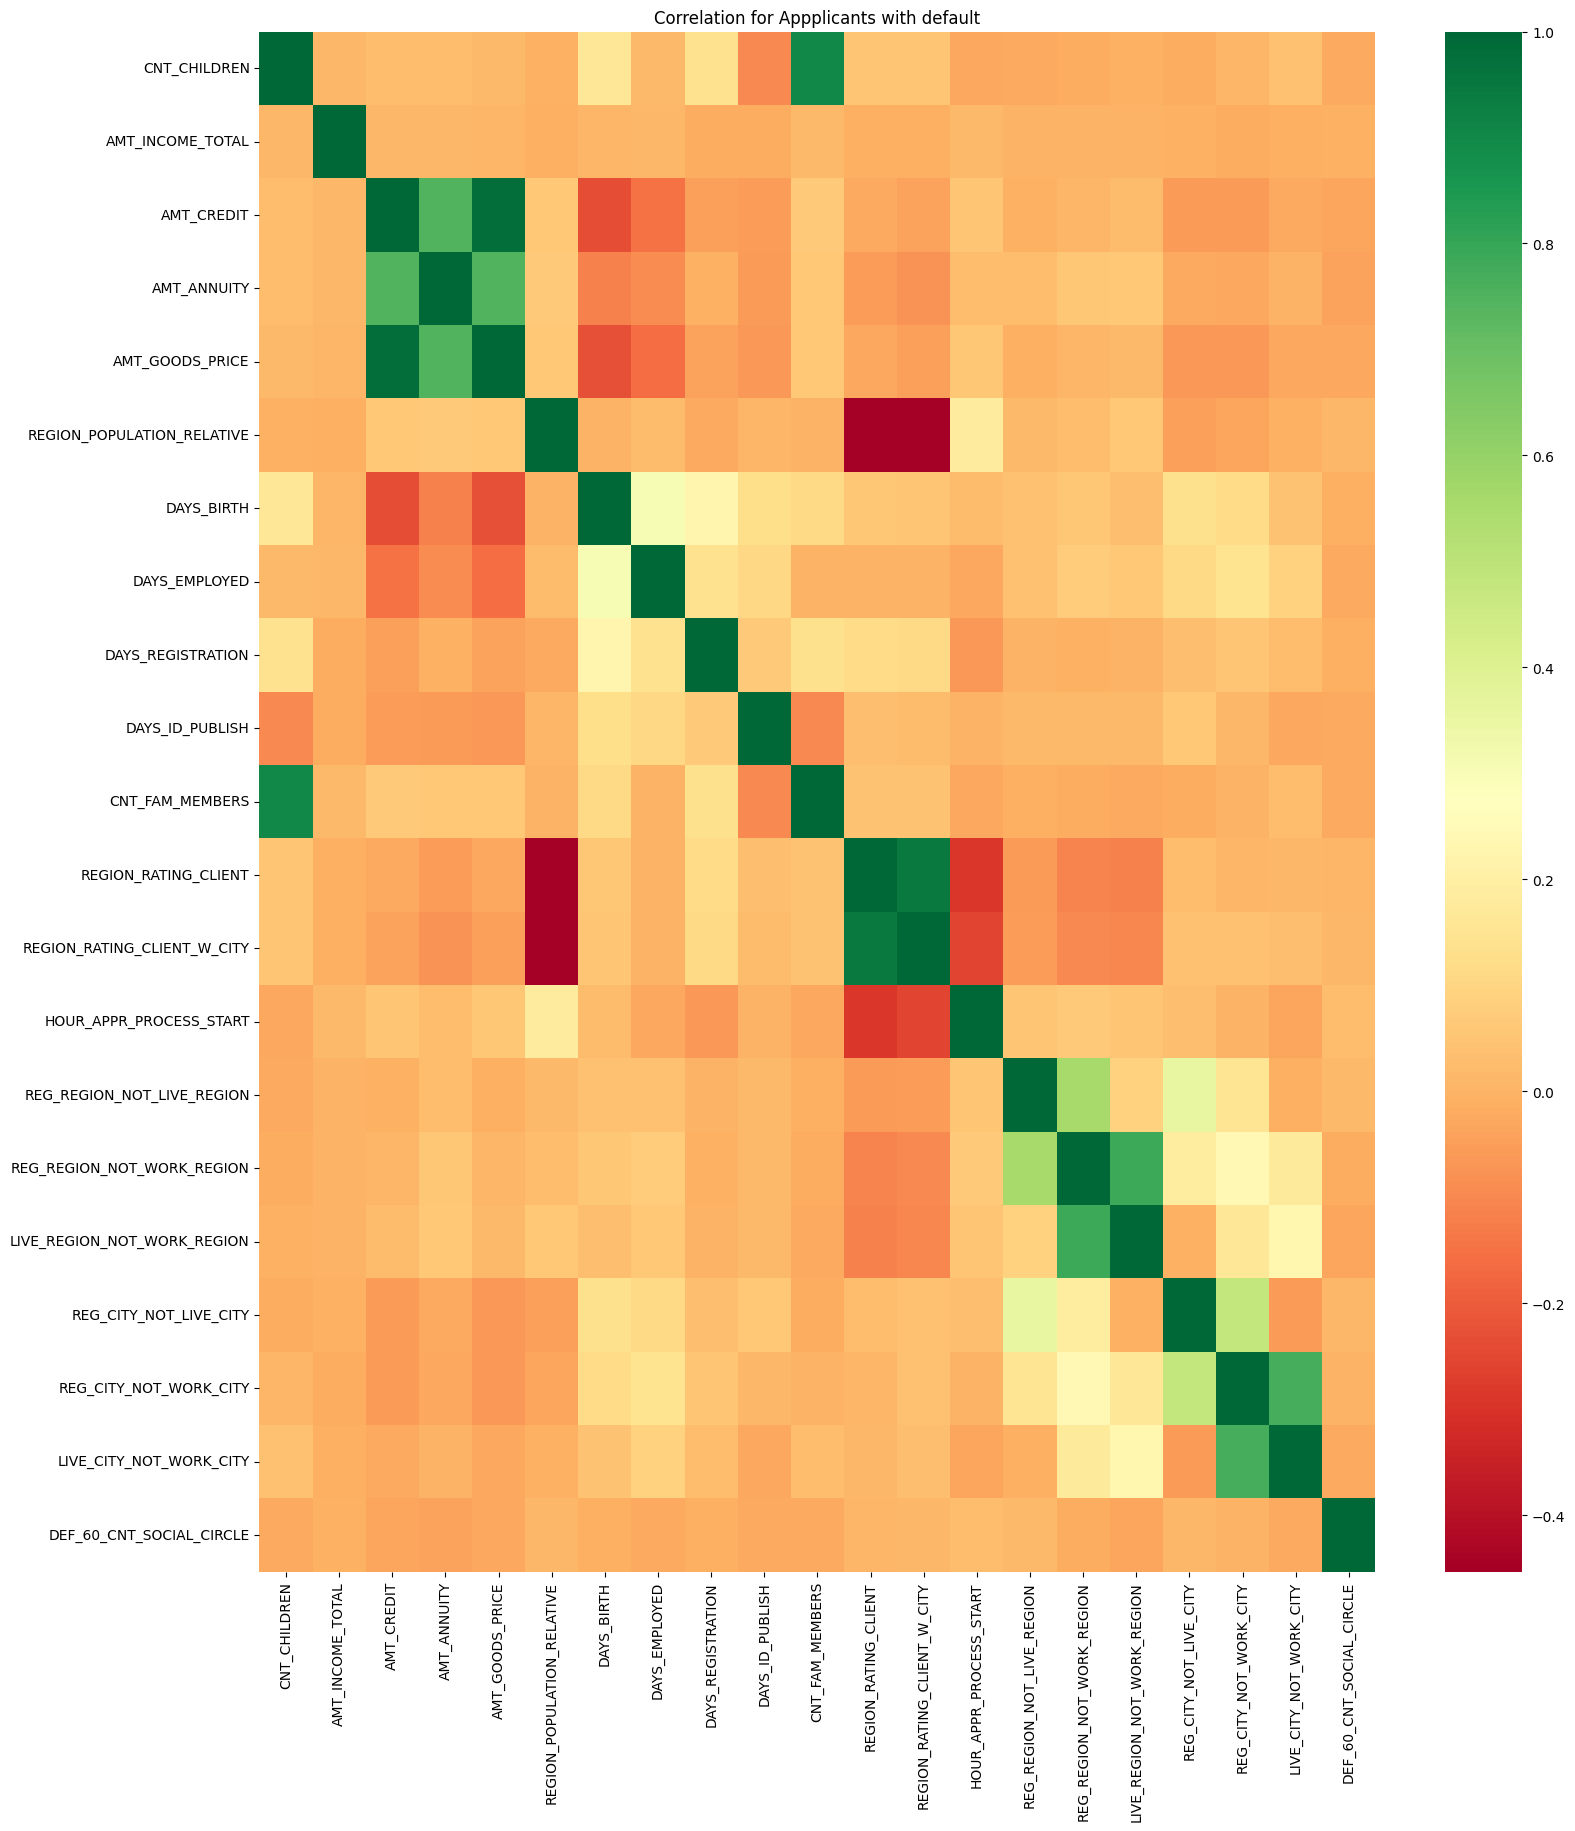

In [ ]:
plt.figure(figsize=[18,20])
sns.heatmap(data=corr_1,annot=False,cmap='RdYlGn')
plt.title('Correlation for Appplicants with default')

Text(0.5, 1.0, 'Correlation for Appplicants without default')

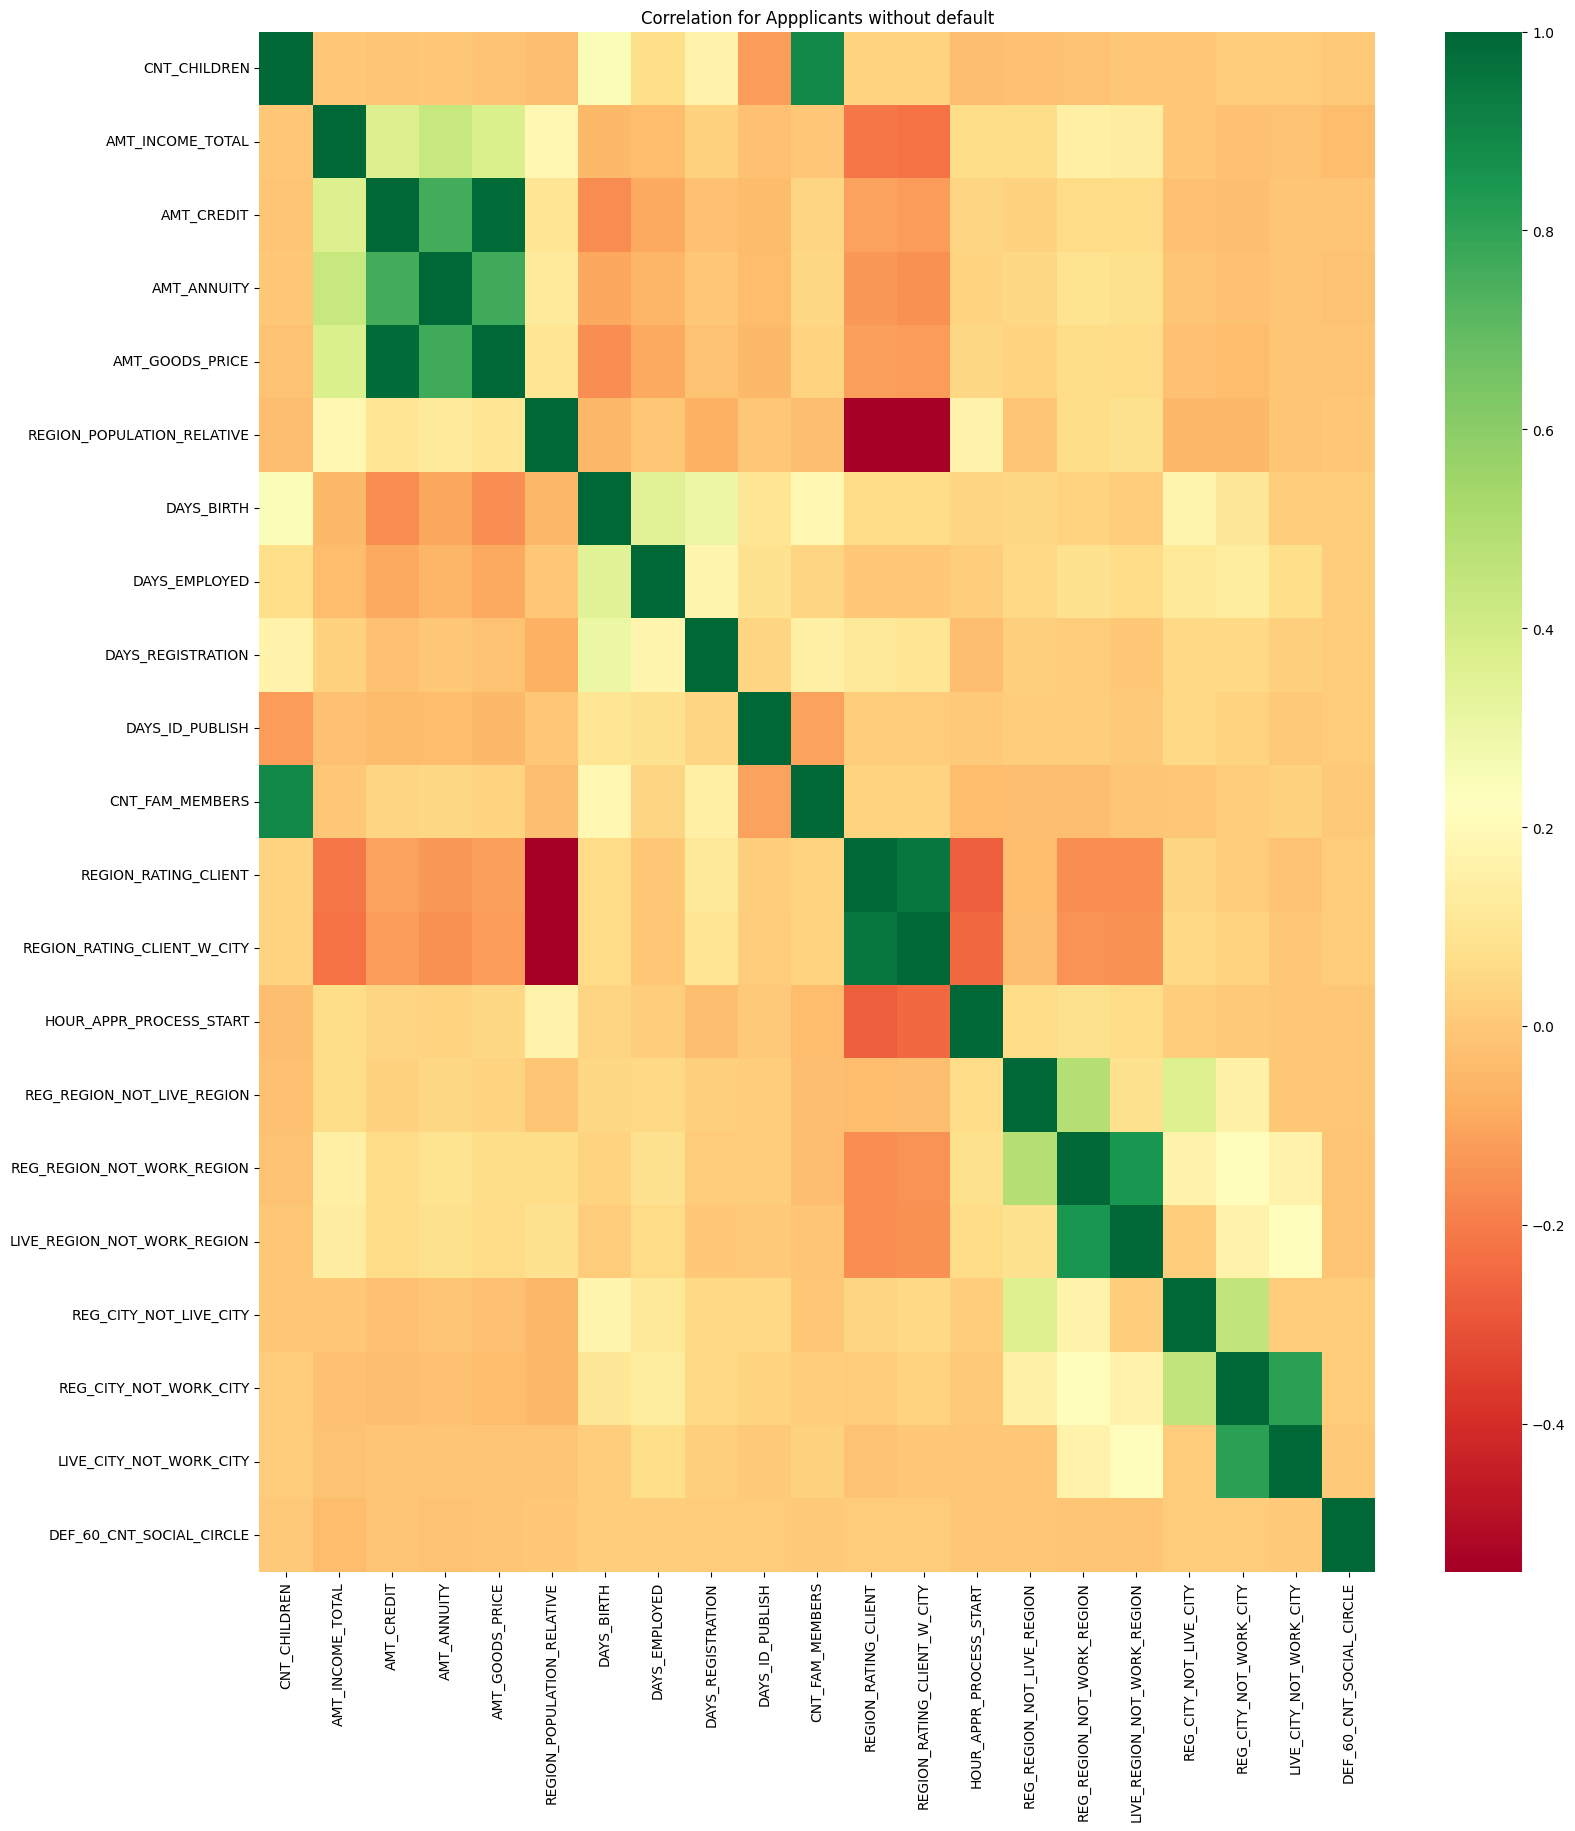

In [ ]:
plt.figure(figsize=[18,20])
sns.heatmap(data=corr_2,annot=False,cmap='RdYlGn')
plt.title('Correlation for Appplicants without default')

In [1]:
#the shades of green shows a higher relation and lighter colours show a lesser relation. We can further use linear regression and other ml methods to further build a model to judge if the the said group of people will default or not

##Insights
1. Business entity types 2 and 3, as well as self-employed individuals, exhibit the lowest default rates.
2. Applicants with incomes falling within the 1 - 1.5 lakh range tend to default less frequently. This may be due to their affordability or possibly because there are fewer applicants in this income bracket. However, further investigation is needed to make a more informed judgment.
3. Women have a higher representation among defaulters. To better understand this trend, we should examine the number of working women, their salaries, and compare them to men in the workforce.
4. Based on the study, students and pensioners do not appear to be the ideal target groups.
5. Married individuals constitute the largest group of loan applicants and defaulters.